In [ ]:
#TASK 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
x = np.random.randn(10, 1)
y = 2 * x + np.random.randn(10, 1)

     Iteration      Loss    Theta0    Theta1
0            0  0.000000  0.000000  0.000000
1            1  8.453739  0.063951 -0.010844
2            2  3.432804  0.125683 -0.021533
3            3  3.239893  0.185274 -0.032068
4            4  3.059907  0.242798 -0.042451
..         ...       ...       ...       ...
396        396  0.506480  1.852456 -0.632090
397        397  0.506480  1.852456 -0.632095
398        398  0.506480  1.852456 -0.632100
399        399  0.506480  1.852457 -0.632105
400        400  0.506480  1.852457 -0.632110

[401 rows x 4 columns]


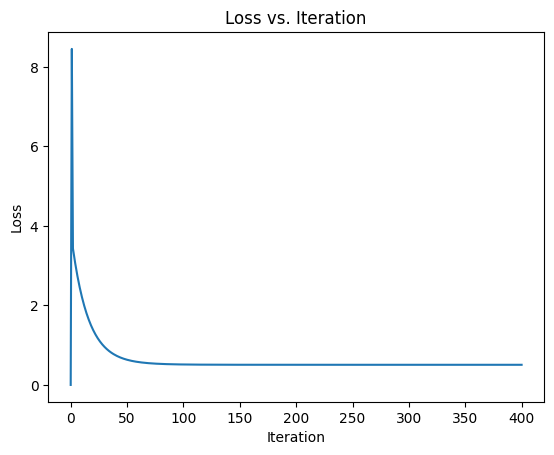

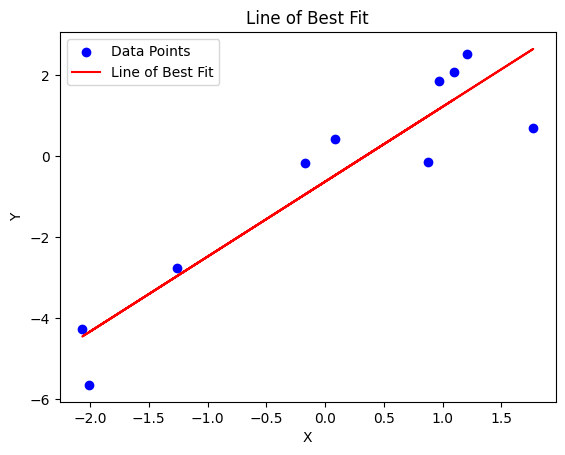

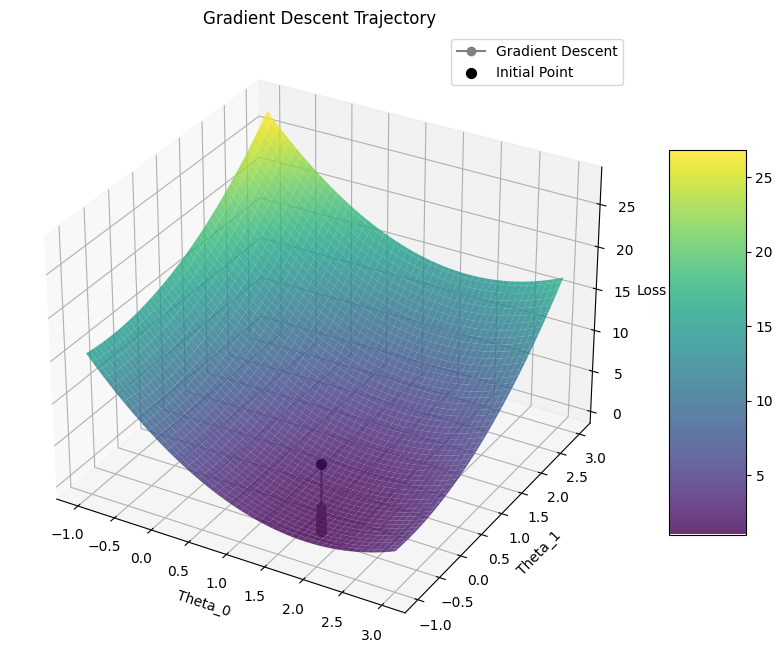

In [ ]:
#TASK 2
def loss_function(theta0, theta1, x,y,yhat):
    m = len(y)
    J = (1 / (2 * m)) * np.sum((yhat - y) ** 2,axis=0)
    return J


#TASK 3
# Initial parameters
w = 0.0
b = 0.0
learning_rate = 0.01

# Gradient descent function
def descend(x, y, w, b, learning_rate):
    dldw = 0.0
    dldb = 0.0
    N = x.shape[0]
    for xi, yi in zip(x, y):
        dldw += -2 * xi * (yi - (w * xi + b))
        dldb += -2 * (yi - (w * xi + b))
    w -= learning_rate * (1 / N) * dldw
    b -= learning_rate * (1 / N) * dldb
    return w, b


#TASK # 5
# Store values in a list of dictionaries
data = []
data.append({'Iteration': 0, 'Loss': 0.0, 'Theta0':0.0, 'Theta1': 0.0})
# Gradient descent iterations
parameters = []
losses = []
for epoch in range(400):
    w, b = descend(x, y, w, b, learning_rate)
    loss = loss_function(b,w,x,y,yhat)
    yhat =w*x+b
    data.append({'Iteration': epoch+1, 'Loss': loss[0], 'Theta0': w[0], 'Theta1': b[0]})
    parameters.append((w, b))
    losses.append(loss[0])


#TASK #6 and TASK #7
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data)
print(df)
# Plot losses against iteration
plt.plot(df['Iteration'], df['Loss'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.show()

# Plot the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the line of best fit
plt.plot(x, yhat, color='red', label='Line of Best Fit')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line of Best Fit')
plt.legend()
plt.show()

# Generate data for 3D plot
theta0_range = np.linspace(-1, 3, 100)
theta1_range = np.linspace(-1, 3, 100)
theta0_values, theta1_values = np.meshgrid(theta0_range, theta1_range)
loss_values = np.zeros_like(theta0_values)

for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        yhat = theta0_values[i, j] * x + theta1_values[i, j]
        loss_values[i, j] = np.mean((y - yhat) ** 2)

# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(theta0_values, theta1_values, loss_values, cmap='viridis', alpha=0.8)

# Add labels and title
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_zlabel('Loss')
ax.set_title('Convex Loss Function')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot trajectory of gradient descent
theta0_traj = [param[0] for param in parameters]
theta1_traj = [param[1] for param in parameters]
loss_traj = np.array(losses).reshape(-1, 1)  # Reshape losses to match the shape of theta0_traj and theta1_traj

ax.plot(theta0_traj, theta1_traj, loss_traj, marker='o', color='gray', label='Gradient Descent')
ax.scatter([parameters[0][0]], [parameters[0][1]], [losses[0]], color='black', s=50, label='Initial Point')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent Trajectory')

plt.legend()
plt.show()


**TASK # 4**

---

**CONVEX FUNCTION:** In mathematics, a real-valued function is called convex if the line segment between any two distinct points on the graph of the function lies above the graph between the two points.

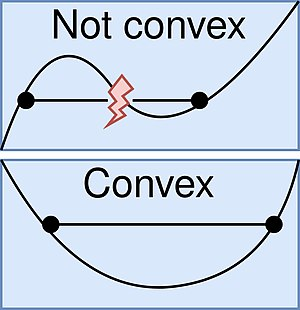
